# Pyber Ride Sharing

3 observations from the data:
* Urban drivers typically drive more frequently yet charge on average (i.e., <30) less than rural drivers.
* Roughly two-thirds of all rides occur in Urban cities, however, roughly 80% of all drivers work in Urban areas.
* While less rides occur in rural cities, there are on average less drivers to manage the load, creating a more favorable driver to ride ratio. 
* Rural drivers have the greatest fare distribution (i.e., roughly 40 dollars/driver) among drivers of all 3 city types.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in City Data csv file
city_df = pd.read_csv('city_data.csv')

# Read in Ride Data csv file
ride_df = pd.read_csv('ride_data.csv')

In [3]:
# Combine the 2 dataframes
pyber_df = pd.merge(city_df, ride_df, on="city", how='left')
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
2,Alvarezhaven,21,Urban,2016-09-01 22:57:12,18.09,1197329964911
3,Alvarezhaven,21,Urban,2016-08-18 07:12:06,20.74,357421158941
4,Alvarezhaven,21,Urban,2016-04-04 23:45:50,14.25,6431434271355


In [4]:
# Find the total fare per city
city_fare_total = pyber_df.groupby('city')['fare'].sum().to_frame()

# Find the average fare ($) per city
city_fare_avg = pyber_df.groupby('city')['fare'].mean().to_frame()

# Find the total number of rides per city
city_total_rides = pyber_df.groupby('city')['ride_id'].count().to_frame()

# Find the total number of drivers per city
city_driver_count = pyber_df.groupby('city')['driver_count'].unique().to_frame()
city_driver_count['driver_count'] = city_driver_count['driver_count'].str.get(0)

# Find the city type (urban, suburban, rural)
city_type = pyber_df.groupby('city')['type'].unique().to_frame()
city_type['type'] = city_type['type'].str.get(0)


In [5]:
# Combine each dataframe
city_fare_avg.columns=["city"]
join_one = city_fare_avg.join(city_total_rides, how="left")
join_one.columns=["Average Fare", "Total Rides"]

join_two = join_one.join(city_fare_total, how="inner")
join_two.columns=["Average Fare", "Total Rides", "City Fare Total"]

join_three = join_two.join(city_driver_count, how="inner")
join_three.columns=["Average Fare", "Total Rides", "City Fare Total", "Driver Count"]

city_agg = join_three.join(city_type, how='inner')
city_agg.columns=["Average Fare", "Total Rides", "City Fare Total", "Driver Count", "City Type"]
city_agg.head()

,Average Fare,Total Rides,City Fare Total,Driver Count,City Type
city,,,,,
Alvarezhaven,23.928710,31,741.79,21,Urban
Alyssaberg,20.609615,26,535.85,67,Urban
Anitamouth,37.315556,9,335.84,16,Suburban
Antoniomouth,23.625000,22,519.75,21,Urban
Aprilchester,21.981579,19,417.65,49,Urban


In [6]:
# Separate data by City Type
urban_data = city_agg.loc[(city_agg['City Type']=='Urban'), :]
suburban_data = city_agg.loc[(city_agg['City Type']=='Suburban'), :]
rural_data = city_agg.loc[(city_agg['City Type']=='Rural'), :]

## Bubble Plot

In [7]:
## Bubble Plot Data
all_urban_rides = urban_data.groupby('city')['Total Rides'].sum()
avg_urban_fare = urban_data.groupby('city')['Average Fare'].mean()

all_suburban_rides = suburban_data.groupby('city')['Total Rides'].sum()
avg_suburban_fare = suburban_data.groupby('city')['Average Fare'].mean()

all_rural_rides = rural_data.groupby('city')['Total Rides'].sum()
avg_rural_fare = rural_data.groupby('city')['Average Fare'].mean()


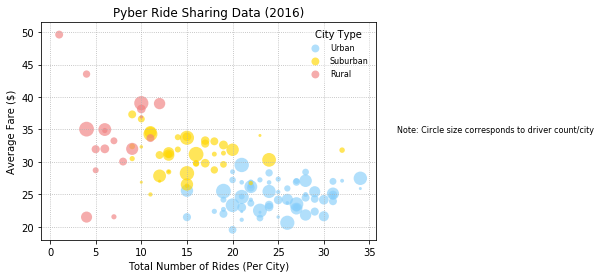

In [8]:
## Bubble Plot

# Store driver count as a Numpy Array
np_city_driver_count = np.array(city_driver_count)
np_city_driver_count = np_city_driver_count * 3

# Add chart note
textstr = 'Note: Circle size corresponds to driver count/city'

urban = plt.scatter(all_urban_rides, avg_urban_fare, s=np_city_driver_count, color='lightskyblue', alpha=0.65, edgecolors='none')
suburban = plt.scatter(all_suburban_rides, avg_suburban_fare, s=np_city_driver_count, color='gold', alpha=0.65, edgecolors='none')
rural = plt.scatter(all_rural_rides, avg_rural_fare, s=np_city_driver_count, color='lightcoral', alpha=0.65, edgecolors='none')

plt.grid(linestyle='dotted')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.gcf().text(0.95, 0.50, textstr, fontsize=8)
plt.legend((urban, suburban, rural),('Urban', 'Suburban', 'Rural'),scatterpoints=1,loc='upper right',ncol=1,\
           fontsize=8, markerscale=0.75,title='City Type', edgecolor='none',framealpha=0.25)

plt.show()


## Pie Charts

### Total Fares by City Type

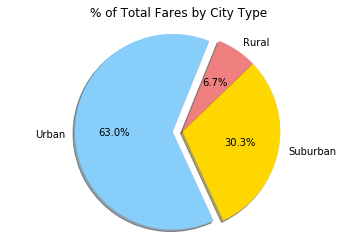

In [9]:
## Find Total Fares By City Type
urban_fare_total = urban_data['City Fare Total'].sum()
suburban_fare_total = suburban_data['City Fare Total'].sum()
rural_fare_total = rural_data['City Fare Total'].sum()


# Create a Pie Chart to Express the Above Date
driver_type = ["Urban", "Suburban", "Rural"]
driver_count = [urban_fare_total, suburban_fare_total, rural_fare_total]
colors = ["lightskyblue", "gold","lightcoral"]
explode = (0.1,0,0)
plt.pie(driver_count, explode=explode, labels=driver_type, colors=colors,
       	autopct="%1.1f%%", shadow=True, startangle=68)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

### Total Rides by City Type

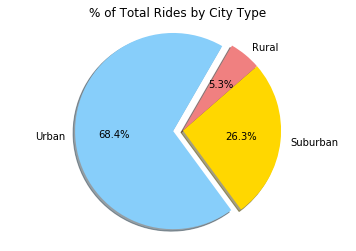

In [10]:
## Find Total Rides By City Type
urban_rides_count = urban_data['Total Rides'].sum()
suburban_rides_count = suburban_data['Total Rides'].sum()
rural_rides_count = rural_data['Total Rides'].sum()


# Create a Pie Chart to Express the Above Date
ride_type = ["Urban", "Suburban", "Rural"]
ride_count = [urban_rides_count, suburban_rides_count, rural_rides_count]
colors = ["lightskyblue", "gold","lightcoral"]
explode = (0.1,0,0)
plt.pie(ride_count, explode=explode, labels=ride_type, colors=colors,
       	autopct="%1.1f%%", shadow=True, startangle=60)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()


### Total Drivers by City Type

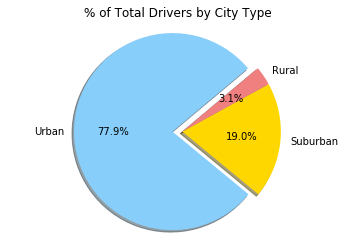

In [11]:
## Find Total Drivers By City Type
urban_driver_count = urban_data['Driver Count'].sum()
suburban_driver_count = suburban_data['Driver Count'].sum()
rural_driver_count = rural_data['Driver Count'].sum()


# Create a Pie Chart to Express the Above Date
driver_type = ["Urban", "Suburban", "Rural"]
driver_count = [urban_driver_count, suburban_driver_count, rural_driver_count]
colors = ["lightskyblue", "gold","lightcoral"]
explode = (0.1,0,0)
plt.pie(driver_count, explode=explode, labels=driver_type, colors=colors,
       	autopct="%1.1f%%", shadow=True, startangle=40)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()


## Average Ride Value Per Driver (by City Type)

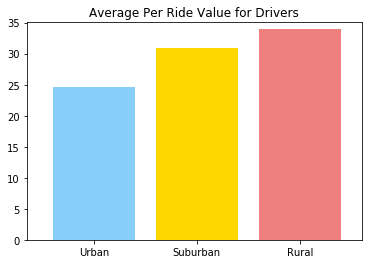

In [12]:
# Identify the average fare for drivers in each city type
urban_avg_driver_pay = urban_fare_total / urban_rides_count
suburban_avg_driver_pay = suburban_fare_total / suburban_rides_count
rural_avg_driver_pay = rural_fare_total / rural_rides_count

# Create a Bar Chart to Express the Above Date
driver_type = ["Urban", "Suburban", "Rural"]
avg_driver_pay = [urban_avg_driver_pay, suburban_avg_driver_pay, rural_avg_driver_pay]
x_axis = np.arange(len(avg_driver_pay))

colors = ["lightskyblue", "gold","lightcoral"]
plt.bar(x_axis, avg_driver_pay, color=colors, align='edge')
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["Urban", "Suburban", "Rural"])
plt.ylim(0, max(avg_driver_pay)+1)
plt.xlim(-0.25, len(driver_type))


plt.title("Average Per Ride Value for Drivers")

plt.show()

## Average Fare Distribution Across All Drivers (by City Type)

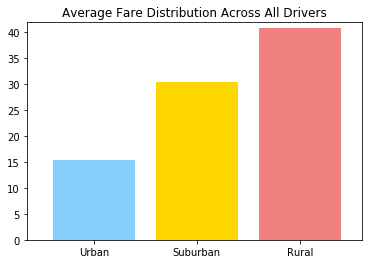

In [13]:
urban_fare_dist = urban_fare_total / urban_driver_count
suburban_fare_dist = suburban_fare_total / suburban_driver_count
rural_fare_dist = rural_fare_total / rural_driver_count

# Create a Bar Chart to Express the Above Date
driver_type = ["Urban", "Suburban", "Rural"]
avg_fare_dist = [urban_fare_dist, suburban_fare_dist, rural_fare_dist]
x_axis = np.arange(len(avg_fare_dist))

colors = ["lightskyblue", "gold","lightcoral"]
plt.bar(x_axis, avg_fare_dist, color=colors, align='edge')
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["Urban", "Suburban", "Rural"])
plt.ylim(0, max(avg_fare_dist)+1)
plt.xlim(-0.25, len(driver_type))


plt.title("Average Fare Distribution Across All Drivers")

plt.show()